In [68]:
from download import download
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model

In [69]:
import patsy
patsy.__version__

'0.5.1'

In [70]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t

In [184]:
#data links
url1 = "https://github.com/MegDie/advanced_lm_introduction/blob/master/datasets/Donnees_comptage.csv"
url2 = "https://github.com/MegDie/advanced_lm_introduction/blob/master/datasets/crash_bikes.csv"

#data download
path_target1 = "datasets/Donnees_comptage.ods"
path_target2 = "datasets/crash_bikes.csv"
#download(url1, path_target1, replace=False)
#download(url2, path_target2, replace=False)

In [72]:
df_bikes = pd.read_csv(path_target2 , na_values="", converters={'data': str, 'heure': str})
df_bikes.heure.unique()
df_bikes['heure']=df_bikes['heure'].replace('', np.nan)
df_bikes.dropna(subset=['heure'], inplace=True)
df_bikes

C:\Users\megan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5,6,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,identifiant accident,date,mois,jour,heure,departement,commune,lat,lon,en agglomeration,...,existence securite,usage securite,obstacle fixe heurte,obstacle mobile heurte,localisation choc,manoeuvre avant accident,identifiant vehicule,type autres vehicules,manoeuvre autres vehicules,nombre autres vehicules
0,200500000030,2005-01-13,01 - janvier,3 - jeudi,19,62,62331,50.30000,2.84000,oui,...,NaN,NaN,NaN,Véhicule,Côté gauche,Changeant de file à gauche,200500000030B02,Transport en commun,Dépassant à gauche,1.0
1,200500000034,2005-01-19,01 - janvier,2 - mercredi,10,62,62022,0.00000,0.00000,non,...,NaN,NaN,NaN,Véhicule,Avant,Sans changement de direction,200500000034B02,"VU seul 1,5T <= PTAC <= 3,5T avec ou sans remo...",Tournant à gauche,1.0
2,200500000078,2005-01-26,01 - janvier,2 - mercredi,13,02,02173,0.00000,0.00000,non,...,Casque,Non,NaN,Véhicule,Avant,Sans changement de direction,200500000078B02,VL seul,Tournant à gauche,1.0
3,200500000093,2005-01-03,01 - janvier,0 - lundi,13,02,02810,49.25500,3.09400,oui,...,NaN,NaN,NaN,Véhicule,Avant gauche,Manœuvre d’évitement,200500000093B02,VL seul,Manœuvre d’évitement,1.0
4,200500000170,2005-01-29,01 - janvier,5 - samedi,18,76,76196,0.00000,0.00000,non,...,Autre,Oui,NaN,Véhicule,Arrière,"Même sens, même file",200500000170A01,"VU seul 1,5T <= PTAC <= 3,5T avec ou sans remo...","Même sens, même file",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65976,201800057521,2018-09-27,09 - septembre,3 - jeudi,8,974,97416,-21.29643,55.46052,non,...,Casque,Oui,NaN,Véhicule,Avant,"Même sens, même file",201800057521B01,VL seul,Tournant à gauche,1.0
65977,201800057582,2018-03-21,03 - mars,2 - mercredi,18,976,97611,-12.76833,45.22532,oui,...,Casque,Oui,NaN,Véhicule,Avant gauche,En s’insérant,201800057582B01,VL seul,"Même sens, même file",1.0
65978,201800057587,2018-03-31,03 - mars,5 - samedi,17,976,97611,-12.78604,45.22107,oui,...,Autre,Non déterminable,NaN,Véhicule,Côté gauche,NaN,201800057587B01,VL seul,Dépassant à gauche,1.0
65979,201800057587,2018-03-31,03 - mars,5 - samedi,17,976,97611,-12.78604,45.22107,oui,...,Autre,Non déterminable,NaN,Véhicule,Côté gauche,NaN,201800057587B01,VL seul,Dépassant à gauche,1.0


In [73]:
time_improved = pd.to_datetime(df_bikes['date'] +
                               ' ' + df_bikes['heure'] + ':00',
                               format='%Y-%m-%d %H:%M')
df_bikes['Time'] = time_improved
df_bikes.set_index('Time',inplace=True)

In [74]:
df_bikes['existence securite'] = df_bikes['existence securite'].replace(np.nan, "Inconnu/Aucune")
df_bikes


,identifiant accident,date,mois,jour,heure,departement,commune,lat,lon,en agglomeration,...,existence securite,usage securite,obstacle fixe heurte,obstacle mobile heurte,localisation choc,manoeuvre avant accident,identifiant vehicule,type autres vehicules,manoeuvre autres vehicules,nombre autres vehicules
Time,,,,,,,,,,,,,,,,,,,,,
2005-01-13 19:00:00,200500000030,2005-01-13,01 - janvier,3 - jeudi,19,62,62331,50.30000,2.84000,oui,...,Inconnu/Aucune,NaN,NaN,Véhicule,Côté gauche,Changeant de file à gauche,200500000030B02,Transport en commun,Dépassant à gauche,1.0
2005-01-19 10:00:00,200500000034,2005-01-19,01 - janvier,2 - mercredi,10,62,62022,0.00000,0.00000,non,...,Inconnu/Aucune,NaN,NaN,Véhicule,Avant,Sans changement de direction,200500000034B02,"VU seul 1,5T <= PTAC <= 3,5T avec ou sans remo...",Tournant à gauche,1.0
2005-01-26 13:00:00,200500000078,2005-01-26,01 - janvier,2 - mercredi,13,02,02173,0.00000,0.00000,non,...,Casque,Non,NaN,Véhicule,Avant,Sans changement de direction,200500000078B02,VL seul,Tournant à gauche,1.0
2005-01-03 13:00:00,200500000093,2005-01-03,01 - janvier,0 - lundi,13,02,02810,49.25500,3.09400,oui,...,Inconnu/Aucune,NaN,NaN,Véhicule,Avant gauche,Manœuvre d’évitement,200500000093B02,VL seul,Manœuvre d’évitement,1.0
2005-01-29 18:00:00,200500000170,2005-01-29,01 - janvier,5 - samedi,18,76,76196,0.00000,0.00000,non,...,Autre,Oui,NaN,Véhicule,Arrière,"Même sens, même file",200500000170A01,"VU seul 1,5T <= PTAC <= 3,5T avec ou sans remo...","Même sens, même file",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-27 08:00:00,201800057521,2018-09-27,09 - septembre,3 - jeudi,8,974,97416,-21.29643,55.46052,non,...,Casque,Oui,NaN,Véhicule,Avant,"Même sens, même file",201800057521B01,VL seul,Tournant à gauche,1.0
2018-03-21 18:00:00,201800057582,2018-03-21,03 - mars,2 - mercredi,18,976,97611,-12.76833,45.22532,oui,...,Casque,Oui,NaN,Véhicule,Avant gauche,En s’insérant,201800057582B01,VL seul,"Même sens, même file",1.0
2018-03-31 17:00:00,201800057587,2018-03-31,03 - mars,5 - samedi,17,976,97611,-12.78604,45.22107,oui,...,Autre,Non déterminable,NaN,Véhicule,Côté gauche,NaN,201800057587B01,VL seul,Dépassant à gauche,1.0


In [75]:
df_bikes['sexe_quanti'] = df_bikes['sexe'].replace("M", 0)
df_bikes['sexe_quanti'] = df_bikes['sexe_quanti'].replace("F", 1)
df_bikes.sexe_quanti.unique()

df_bikes['grave_quanti'] = df_bikes['gravite accident']
df_bikes['grave_quanti'] = df_bikes['grave_quanti'].replace("0 - Indemne", 0)
df_bikes['grave_quanti'] = df_bikes['grave_quanti'].replace("1 - Blessé léger", 1)
df_bikes['grave_quanti'] = df_bikes['grave_quanti'].replace("2 - Blessé hospitalisé", 2)
df_bikes['grave_quanti'] = df_bikes['grave_quanti'].replace("3 - Tué", 3)
df_bikes['grave_quanti']

#largeur route
#largeur TPC
#nb voies
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 65515 entries, 2005-01-13 19:00:00 to 2018-07-31 11:00:00
Data columns (total 41 columns):
identifiant accident          65515 non-null int64
date                          65515 non-null object
mois                          65515 non-null object
jour                          65515 non-null object
heure                         65515 non-null object
departement                   65515 non-null object
commune                       65515 non-null object
lat                           65515 non-null float64
lon                           65249 non-null float64
en agglomeration              65515 non-null object
type intersection             65513 non-null object
type collision                65511 non-null object
luminosite                    65515 non-null object
conditions atmosperiques      65512 non-null object
type route                    65504 non-null object
circulation                   143 non-null object
nb voies                 

In [76]:
df_bikes.columns.unique()


Index(['identifiant accident', 'date', 'mois', 'jour', 'heure', 'departement',
       'commune', 'lat', 'lon', 'en agglomeration', 'type intersection',
       'type collision', 'luminosite', 'conditions atmosperiques',
       'type route', 'circulation', 'nb voies', 'profil long route',
       'trace plan route', 'largeur TPC', 'largeur route', 'etat surface',
       'amenagement', 'situation', 'categorie usager', 'gravite accident',
       'sexe', 'age', 'motif deplacement', 'existence securite',
       'usage securite', 'obstacle fixe heurte', 'obstacle mobile heurte',
       'localisation choc', 'manoeuvre avant accident', 'identifiant vehicule',
       'type autres vehicules', 'manoeuvre autres vehicules',
       'nombre autres vehicules', 'sexe_quanti', 'grave_quanti'],
      dtype='object')

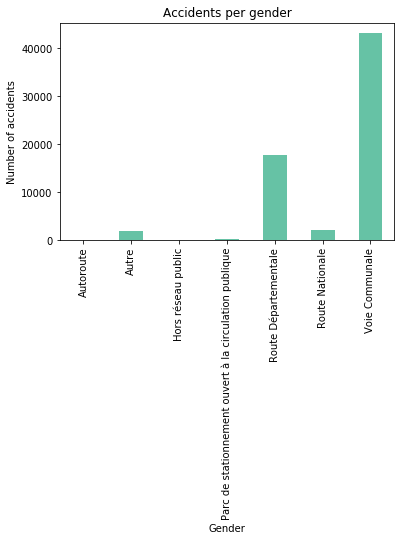

In [145]:
sns.set_palette("Set2", n_colors=12)
plt.figure()
df_bikes.groupby('type route').size().plot(kind='bar')
plt.xlabel("Gender")
plt.ylabel("Number of accidents")
plt.title("Accidents per gender")
plt.savefig('Gender.pdf', bbox_inches="tight")

In [93]:
interest = ['gravite accident', 'grave_quanti', 'sexe', 'type collision', 'type route', 'existence securite', 'motif deplacement']

In [98]:
df_bikes_ols = df_bikes[interest]
df_bikes_ols = df_bikes_ols.dropna(how = 'any')
df_bikes_ols.rename(columns = {'gravite accident': 'grav_acc', 
                                  'type collision': 'collision_type', 'type route': 'road_type', 
                                  'existence securite': 'security', 
                                  'motif deplacement': 'exit_pattern'}, inplace=True)

,grav_acc,grave_quanti,sexe,collision_type,road_type,security,exit_pattern
Time,,,,,,,
2005-01-13 19:00:00,1 - Blessé léger,1,M,Deux véhicules - par le coté,Route Départementale,Inconnu/Aucune,Promenade - loisirs
2005-01-19 10:00:00,2 - Blessé hospitalisé,2,M,Deux véhicules - frontale,Route Départementale,Inconnu/Aucune,Promenade - loisirs
2005-01-26 13:00:00,1 - Blessé léger,1,M,Deux véhicules - par le coté,Route Départementale,Casque,Promenade - loisirs
2005-01-03 13:00:00,2 - Blessé hospitalisé,2,F,Deux véhicules - frontale,Route Départementale,Inconnu/Aucune,Utilisation professionnelle
2005-01-29 18:00:00,1 - Blessé léger,1,M,Deux véhicules - par l’arrière,Route Départementale,Autre,Promenade - loisirs
...,...,...,...,...,...,...,...
2018-03-08 19:00:00,1 - Blessé léger,1,M,Deux véhicules - par le coté,Route Départementale,Equipement réfléchissant,Promenade - loisirs
2018-09-27 08:00:00,1 - Blessé léger,1,M,Deux véhicules - par le coté,Voie Communale,Casque,Domicile - travail
2018-03-21 18:00:00,1 - Blessé léger,1,M,Deux véhicules - par l’arrière,Route Nationale,Casque,Autre


In [132]:
df_test = df_bikes_ols.iloc[0:1000]
df_sample = df_bikes_ols.iloc[1000:51947]

SyntaxError: invalid syntax (<ipython-input-124-07292a1301f6>, line 1)

In [141]:
results = smf.ols('grave_quanti ~ collision_type + security + exit_pattern', data=df_sample).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           grave_quanti   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     402.7
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:30:03   Log-Likelihood:                -48069.
No. Observations:               50947   AIC:                         9.617e+04
Df Residuals:                   50930   BIC:                         9.632e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            1.2824      0.016     81.579      0.000       1.252       1.313
collision_type[T.Autre]                                             -0.3460      0.013    -26.555      0.000      -0.372      -0.320
collision_type[T.Deux véhicules - frontale]                          0.1733      0.014     12.686      0.000       0.147       0.200
collision_type[T.Deux véhicules - par le coté]                      -0.0831      0.012     -6.939      0.000      -0.107      -0.060
collision_type[T.Deux véhicules - par l’arrière]                     0.0262      0.014      1.890      0.059      -0.001       0.053
collision_type[T.Trois véhicules et plus - collisions multiples]    -0.0631      0.020     -3.195      0.001      -0.102      -0.024
collision_type[T.Trois véhicules et plus - en chaîne]               -0.2538      0.032     -7.967      0.000      -0.316      -0.191
security[T.Casque]                                                   0.0707      0.006     10.892      0.000       0.058       0.083
security[T.Ceinture]                                                 0.4759      0.018     26.321      0.000       0.440       0.511
security[T.Dispositif enfants]                                       0.0829      0.067      1.232      0.218      -0.049       0.215
security[T.Equipement réfléchissant]                                 0.1283      0.012     10.806      0.000       0.105       0.152
security[T.Inconnu/Aucune]                                           0.1702      0.011     15.920      0.000       0.149       0.191
exit_pattern[T.Courses - achats]                                     0.3120      0.021     14.851      0.000       0.271       0.353
exit_pattern[T.Domicile - travail]                                  -0.0301      0.012     -2.458      0.014      -0.054      -0.006
exit_pattern[T.Domicile - école]                                    -0.0454      0.016     -2.847      0.004      -0.077      -0.014
exit_pattern[T.Promenade - loisirs]                                  0.1572      0.011     14.266      0.000       0.136       0.179
exit_pattern[T.Utilisation professionnelle]                         -0.1984      0.018    -11.262      0.000      -0.233      -0.164
==============================================================================
Omnibus:                      779.349   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              820.516
Skew:                           0.298   Prob(JB):                    6.72e-179
Kurtosis:                       3.178   Cond. No.                         35.5
============================

In [142]:
results.params

Intercept                                                           1.282355
collision_type[T.Autre]                                            -0.345999
collision_type[T.Deux véhicules - frontale]                         0.173333
collision_type[T.Deux véhicules - par le coté]                     -0.083131
collision_type[T.Deux véhicules - par l’arrière]                    0.026163
collision_type[T.Trois véhicules et plus - collisions multiples]   -0.063144
collision_type[T.Trois véhicules et plus - en chaîne]              -0.253769
security[T.Casque]                                                  0.070711
security[T.Ceinture]                                                0.475861
security[T.Dispositif enfants]                                      0.082870
security[T.Equipement réfléchissant]                                0.128278
security[T.Inconnu/Aucune]                                          0.170193
exit_pattern[T.Courses - achats]                                    0.312006

In [163]:
Yhat = results.predict(df_test)
Yhat_proc = np.arange(1000)
for i in range(1000):
    if Yhat[i] <= 0.5:
        Yhat_proc[i] = 0
    if Yhat[i] <= 1.5 and Yhat[i] > 0.5:
        Yhat_proc[i] = 1
    if Yhat[i] <= 2.5 and Yhat[i] > 1.5:
        Yhat_proc[i] = 2
    if Yhat[i] > 2.5:
        Yhat_proc[i] = 3
        
        
        
    

In [164]:
Yhat_proc

array([2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [176]:
res = df_test['grave_quanti'] == Yhat_proc
n=0
for i in range(1000):
    if res[i]==True:
        n=n+1
        
    

In [178]:
n/1000

0.538

On va selectionner certaines variables que l'on va convertir en numérique (type facteur) pour effectuer la régression des moindres carrés.
quantitatives : largeur route (belle gaussienne)
quali : usage de sécurité, obstacle fixe heurte
et on va estimer la variable gravité!

In [13]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 65515 entries, 2005-01-13 19:00:00 to 2018-07-31 11:00:00
Data columns (total 39 columns):
identifiant accident          65515 non-null int64
date                          65515 non-null object
mois                          65515 non-null object
jour                          65515 non-null object
heure                         65515 non-null object
departement                   65515 non-null object
commune                       65515 non-null object
lat                           65515 non-null float64
lon                           65249 non-null float64
en agglomeration              65515 non-null object
type intersection             65513 non-null object
type collision                65511 non-null object
luminosite                    65515 non-null object
conditions atmosperiques      65512 non-null object
type route                    65504 non-null object
circulation                   143 non-null object
nb voies                 

In [185]:
df_comptage = pd.read_csv(path_target1 , na_values="", low_memory=False, converters={'data': str, 'heure': str})


ParserError: Error tokenizing data. C error: Expected 1 fields in line 4, saw 2
